## Day3_Review : 3층 신경망 구현

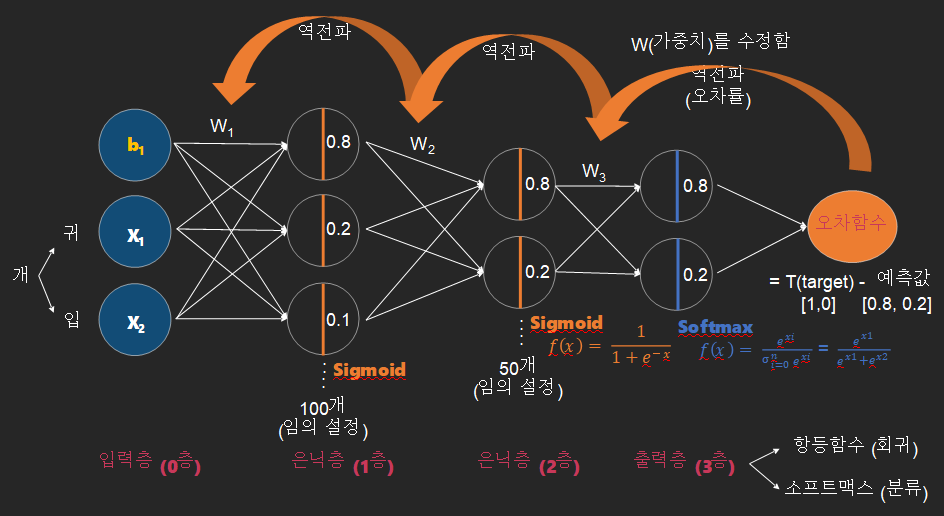

## 면접문제3번 

### 신경망 학습시 왜 배치처리를 해야 하나요?
1. numpy가 다차원 행렬의 연산을 빠르게 하게끔 최적화 된 모듈이기 때문.
2. 큰 배열을 한꺼번에 계산을 하는것이 분할된 작은 배열을  여러번 계산하는 것보다 빠르기 때문입니다ㅠ

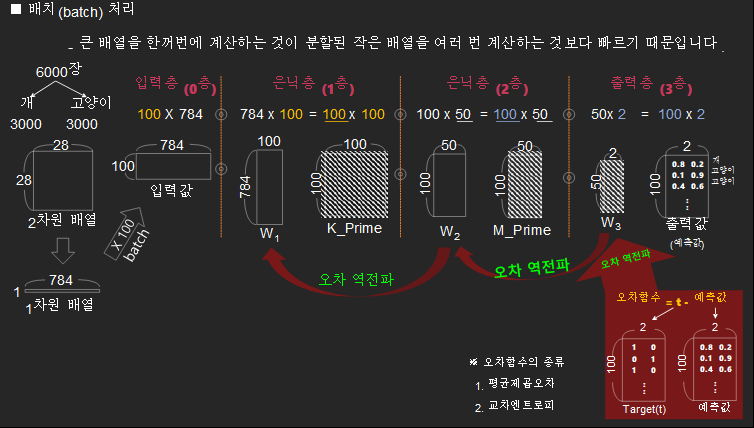

## Day3_Review : 3층 신경망 구현하기

In [ ]:
# 입력층(0층)  -> 은닉1층(1층) -> 은닉2층(2층) -> 출력층(3층)
# 그림보고 이해 잘해두기 !
# 최종 완성본!

import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(a):
    C = np.max(a)
    minus = a - C # + C_prime을 (-C)로 처리
    exp_a = np.exp(minus) # 마지막식 분자
    sum_exp_a = np.sum(exp_a) # 마지막식 분모
    y = exp_a / sum_exp_a # numpy broadcast 기능으로 계산이 가능
    
    return y

# 입력층 (0층)
x = np.array([1,2])

# 은닉1층 (1층)
w1 = np.array([[1,3,5],[2,4,6]])
k = np.dot(x,w1) # 가중치들의 곱의 합을 내적으로 표현함. (중요)

k_prime = sigmoid(k)


# 은닉2층 (2층)
w2 = np.array([[6,7],[8,9],[10,11]]) 
m = np.dot(k_prime,w2) # 가중치들의 곱의 합을 내적으로 표현함.

m_prime = sigmoid(m) # 시그모이드 적용

# 출력층 (3층) 
# softmax 함수 적용 예정 (sigmoid 아님)

w3 = np.array([[3,4],[5,6]])
o = np.dot(m_prime,w3)

o_prime = softmax(o)

print(o_prime)
print(np.sum(o_prime))

## ■ 6. 손글씨 글자 인식(mnist) 구현하기

1. 어제 작성했던 3층 신경망 코드를 좀 더 심플하게 재작성하기.

## 예제1. 어제 만들었던 3층 신경망의 가중치 w1, w2, w3를 딕셔너리로 구현

In [6]:
import numpy as np

network = {}
network['W1'] = np.array([[1,3,5],[2,4,6]])
network['W2'] = np.array([[6,7],[8,9],[10,11]])
network['W3'] = np.array([[3,4],[5,6]])

print(network)
print(network.keys())
print(network.values())

{'W1': array([[1, 3, 5],
       [2, 4, 6]]), 'W2': array([[ 6,  7],
       [ 8,  9],
       [10, 11]]), 'W3': array([[3, 4],
       [5, 6]])}
dict_keys(['W1', 'W2', 'W3'])
dict_values([array([[1, 3, 5],
       [2, 4, 6]]), array([[ 6,  7],
       [ 8,  9],
       [10, 11]]), array([[3, 4],
       [5, 6]])])


## 문제36.   
## 위의 코드를 함수로 생성하시오! (함수이름 : init_network())  
## return은 network으로 하세요~

In [1]:
import numpy as np

def init_network(): # 딕셔너리 형으로 가중치들을 표현해주는 함수.
    network = {}
    network['W1'] = np.array([[1,3,5],[2,4,6]])
    network['W2'] = np.array([[6,7],[8,9],[10,11]])
    network['W3'] = np.array([[3,4],[5,6]])
    
    return network

network = init_network()
print(network['W1'])

[[1 3 5]
 [2 4 6]]


## 예제2. 지금 만든 init_network() 함수를 포함해서 어제만들었던   
## 신경망에 필요한 함수들을 하나로 모아서 common.py라는 이름으로 저장하시오.

1. init_network()
2. sigmoid()
3. softmax()
4. relu()
5. set_function()

In [ ]:
# working 디렉토리에 저장한 뒤

from common import *

network = common.init_network()
print(network['W1'])

## 예제3. 3층 신경망 전체 코드를 작성하시오~

In [ ]:
from common import *
network = init_network()

W1, W2, W3 = network['W1'], network['W2'], network['W3']

# 1층
x = np.array([[1,2]])
y = np.dot(x,W1)
y_hat = sigmoid(y)

# 2층
z = np.dot(y_hat, W2)
z_hat = sigmoid(z)

# 3층
k = np.dot(z_hat, W3)
k_hat = softmax(k)
print(k_hat)

## 문제37(점심시간문제) 위의 시그모이드 함수를 렐루 함수로 변경해서 수행하시오!

## 위의 코드를 forward 함수를 만들어서 아래와 같이 수행되게 하시오~

In [ ]:
from common import *

def forward(network,x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']

    # 1층
    y = np.dot(x,W1)
    y_hat = relu(y)

    # 2층
    z = np.dot(y_hat, W2)
    z_hat = relu(z)

    # 3층
    k = np.dot(z_hat, W3)
    k_hat = softmax(k)
    return k_hat

network = init_network()
x = np.array([1,2])

print(forward(network,x))

## ■ 필기체 데이터를 신경망에 로드하기 

### 필요한 파일 2가지 ? 

__1. 필기체 데이터 ( dataset.zip )__  

mnist 데이터는 0 ~ 9 까지의 숫자 이미지로 구성된 필기체 데이터. 

훈련 데이터가 6만장, 테스트 데이터가 1만장 

28 x 28 크기의 회색조 이미지(1채널) 이며, 각 픽셀 0~255 까지의 값을 

취합니다. 

 
__2. 저자가 이미 학습해서 만들어 놓은 가중치와 바이어스__ 

( sample_weight.pkl )  <--- pickle file 

## 예제1. 필기체 데이터를 파이썬으로 로드하는데 로드하고 훈련 데이터가 6만장이고,   
## 테스트 데이터가 1만장인지 확인하시오!

In [ ]:
import sys,os # os의 파일을 파이썬으로 가져오기 위해 필요함
sys.path.append(os.pardir) # 부모 디렉토리의 파일을 가져올 수 있도록 설정

from dataset.mnist import load_mnist # dataset 패키지 안에 있는 mnist 모듈에 load_mnist 함수를 가져와라.

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize= False)

# flatten = True : 28x28 이미지를 784 1차원 배열로 만드는 것이다.
# normalize = False 0~255 숫자 데이터를 0~1사이의 숫자로 정규화 안하는 것.

print(x_train.shape) # (60000,784) 28x28사진 60000만장을 784로 편 상태.
print(x_test.shape) # (10000,784) 28x28사진 10000만장을 784로 편 상태.

## 예제2. 필기체 데이터 숫자 하나를 시각화 한다.

In [ ]:
import sys,os # os의 파일을 파이썬으로 가져오기 위해 필요함
sys.path.append(os.pardir) # 부모 디렉토리의 파일을 가져올 수 있도록 설정

from dataset.mnist import load_mnist # dataset 패키지안에 mnist 모듈에 load_mnist 함수를 가져와라.

(x_train, t_train), (x_test, t_test) = \

load_mnist(flatten=False, normalize= False) # 숫자5를 보기위해 flatten = False로 준 상태

# x_train : 데이터 
# x_test : 테스트 데이터
# t_train : 정답 
# t_test : 테스트 데이터의 정답

img = x_train[0]
label = t_train[0]

print(img)
print(label) # 5
print(img.shape)  # (1, 28, 28) 
# 1(색조) = 흑백 // 만약, 3(색조) = Color(R,G,B) // (28,28) -> 가로/ 세로 사이즈

## 예제3. 위의 숫자 5를 img_show()함수로 시각화 하시오.

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(): # 이미지를 출력하는 함수
    pil_img = Image.fromarray(np.uint8(img)) # 파이썬 이미지 객체로 변환하는 코드.
    pil_img.show() # pil_img 객체의 show라는 메소드를 샐행.
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = False, normalize = False)

img = x_train[0] #  1차원으로 쭉 늘어져있는 상태
img = img.reshape(28,28) # 원래의 2차원으로 변경. (784,) --> (28,28)

img_show(img)

## 예제4. 훈련 데이터의 정답에 해당하는 t_train[0]이 숫자 5를 나타내는데  
## 이를 one hot encoding 해서 출력하시오.

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(): # 이미지를 출력하는 함수
    pil_img = Image.fromarray(np.uint8(img)) # 파이썬 이미지 객체로  변환하는 코드.
    pil_img.show() # pil_img 객체의 show라는 메소드를 샐행.
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize= False, one_hot_label = True)

print(t_train[0]) 

# one hot encoding을 하면
# 인덱스 숫자5에 해당되는 부분만 1로 바뀌어져 있다.
# [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] (※ 오차함수 구하기 쉽게 하기 위해서 one hot encoding를 한다.)

### ※ one hot encoding을 하는 이유는? 

오차함수에서 오차를 구하기 쉽게 하기 위해서.

## 개와 고양이 사진 분류를 할때 one hot encoding?

[1 0 ] # 개  
[0,1] # 고양이

## ■ MNIST 흑백 이미지와 RGB 컬러 이미지의 shape의 차이

### 1. mnist데이터의 shape를 확인하시오!

In [ ]:
import sys,os # os의 파일을 파이썬으로 가져오기 위해 필요함
sys.path.append(os.pardir) # 부모 디렉토리의 파일을 가져올 수 있도록 설정

from dataset.mnist import load_mnist # dataset 패키지안에 mnist 모듈에 load_mnist 함수를 가져와라.

# mnist데이터의 shape를 확인

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize= False, one_hot_label = True)

print(x_train.shape)  # (60000, 1, 28, 28)

# 60000 : 전체 데이터 사진수, 1: 색조(흑백), 28(가로의 픽셀개수), 28(세로의 픽셀개수)

### 2. 아이린 사진의 shape를 확인하시오!

In [ ]:
# RGB를 설명하기 위한 사진

from PIL import Image # 파이썬 이미지 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg

img = Image.open('d:\\배경화면.jpg')
img_pixel = np.array(img) # 이미지를 숫자배열로 표현
plt.imshow(img_pixel)
print(img_pixel.shape)

# (500, 500, 3) <-- 가로, 세로, 색조
# 색조 3 : Red, Green, Blue

## 예제1. 아이린 사진에서 red 부분의 행렬만 출력하고 red 부분만 이미지로 시각화 하시오!

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg

img = Image.open('d:\\배경화면.jpg')
img_pixel = np.array(img)

print(img_pixel[:, :, 0]) # red 부분의 행렬이 출력

img_pixel[:,:,1] = 0 # green부분을 0으로 다바꿈
img_pixel[:,:,2] = 0 # blue 부분을 0으로 다바꿈
plt.imshow(img_pixel)
plt.show()

## 예제2. 아이린 사진의 green 부분만 시각화 하시오!

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg

img = Image.open('d:\\배경화면.jpg')
img_pixel = np.array(img)

print(img_pixel[:, :, 1]) # green 부분의 행렬이 출력

img_pixel[:,:,0] = 0 # red부분을 0으로 다바꿈
img_pixel[:,:,2] = 0 # blue 부분을 0으로 다바꿈
plt.imshow(img_pixel)
plt.show()

## ■ 저자가 이미 만들어 놓은 가중치(W)와 바이어스(b)가 들어있는 pickle 파일을   
## 파이썬으로  불러와서 가중치와 바이어스의 shape를 확인하는 작업

In [ ]:
import pickle 
# pickle 모듈은 객체 구조 그대로 파일에 저장하거나, 읽어올 수 있도록 하는 파이썬 모듈이다.
# 숫자와 같은 데이터를 binary file로 생성


def init_network():
    with open("D:\\sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

network = init_network()
print(network['W1'].shape) # (784, 50) 은닉1층의 노드수 50개
print(network['W2'].shape) # (50, 100) 은닉2층의 노드수 100개
print(network['W3'].shape) # (100, 10) 출력층의 노드수 10개
print(network['b1'].shape) # 은닉 1층의 바이어스 50개
print(network['b2'].shape) # 은닉 2층의 바이어스 100개
print(network['b3'].shape) # 은닉 3층의 바이어스 10개

## ■ 필기체 데이터를 입력받아 어떤 숫자인지 예측하는 3층 신경망 구현

1. get_data() 함수 : mnist 데이터를 로드해서 테스트 데이터(10000장)들을 가져오는 함수
2. init_network() 함수 : 저자가 만든 sample_weight.pkl 파일을 파이썬으로 불러오는 함수
3. predict() 함수 : 3층 신경망을 쌓아서 필기체 데이터를 예측하는 신경망 함수

In [ ]:
# 필요한 패키지들을 로드한다.

import sys,os
import pickle
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

# get_data 함수 만들기.
def get_data():
    (x_train, t_train), (x_test, t_test) = \ # 줄이 너무길어지면 \를 통하여 밑에줄에도 쓸 수 있다.
    load_mnist(normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test

# init_network() 함수 만들기
def init_network():
    with open("D:\\sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

# predict() 함수 만들기
def predict(network,x):
    # x에 사진 한장만 넣어서 확인할 예정
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 1층
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    # 2층
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    
    # 3층
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

# 이미지 1개를 신경망에 넣어본다.
    
x, t = get_data()
network = init_network()
y = predict(network, x[0])
print(t[0]) #7
print(y)
print(np.argmax(y)) #벡터의 제일 큰 숫자의 원소의 인덱스 번호 출력

## 문제38 (오늘의 마지막 문제). 지금 만든 신경망에 테스터 데이터를 100장을 입력하고 100장중에 몇장을 신경망이 맞추었는지 확인하시오!


### 결과 : 정확도 96%

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 19 16:11:01 2019

@author: wdp
"""
# 필요한 패키지들을 로드한다.

import sys,os
import pickle
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np



# get_data 함수 만들기.
def get_data():
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test

# init_network() 함수 만들기
def init_network():
    with open("D:\\sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

# predict() 함수 만들기
def predict(network,x):
    # x에 사진 한장만 넣어서 확인할 예정
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 1층
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    # 2층
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    
    # 3층
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

# 이미지 1개를 신경망에 넣어본다.
    
x, t = get_data()
network = init_network()
cnt = 0

for i in range(100):
    y = predict(network, x[i])
    if t[i] == np.argmax(y):
        cnt += 1

result = (cnt/100) * 100
print(result)

In [ ]:
#패키지 로드

import sys, os
import pickle
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

#get_data 만들기

def get_data() :

    (x_train, t_train), (x_test, t_test) = \

    load_mnist(normalize = True, flatten = True, one_hot_label = False)

    return x_test, t_test

#init_network 만들기

def init_network() :

    with open("C:\\Users\wdp\Desktop\Jupyter Notebook\DeepLearning\deep-learning-from-scratch-master\ch03\sample_weight.pkl", "rb") as f :

        network = pickle.load(f)

    return network

#predict 만들기

def predict(network, x) :

    W1, W2, W3 = network['W1'], network['W2'], network['W3']

    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    #1층

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    

    #2층

    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    

    #3층

    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

size = 100

x, t = get_data()

network = init_network()

y = predict(network, x[:size])

y_ = t[:size] == np.argmax(y, axis = 1)

print('정확도 {0}%'.format(np.sum(y_.astype(np.int)/size*100)))